In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('csgo_round_snapshots.csv')

In [3]:
data.shape

(122410, 97)

In [4]:
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [6]:
data.isnull().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

In [7]:
types=['object' , 'bool']
categorical_columns=list(data.select_dtypes(include=types).columns)

In [8]:
'''
fig, ax = plt.subplots(3,1, figsize = (15,20))

ax = np.ravel(ax)
for i in range(len(categorical_columns)):
    sns.countplot(data = data, x = categorical_columns[i], ax = ax[i], palette="magma", order = data[categorical_columns[i]].value_counts().index)
    ax[i].set_xticklabels(labels = data[categorical_columns[i]].unique(), ha='right')
ax = np.reshape(ax, (3, 1))
plt.tight_layout()
'''

'\nfig, ax = plt.subplots(3,1, figsize = (15,20))\n\nax = np.ravel(ax)\nfor i in range(len(categorical_columns)):\n    sns.countplot(data = data, x = categorical_columns[i], ax = ax[i], palette="magma", order = data[categorical_columns[i]].value_counts().index)\n    ax[i].set_xticklabels(labels = data[categorical_columns[i]].unique(), ha=\'right\')\nax = np.reshape(ax, (3, 1))\nplt.tight_layout()\n'

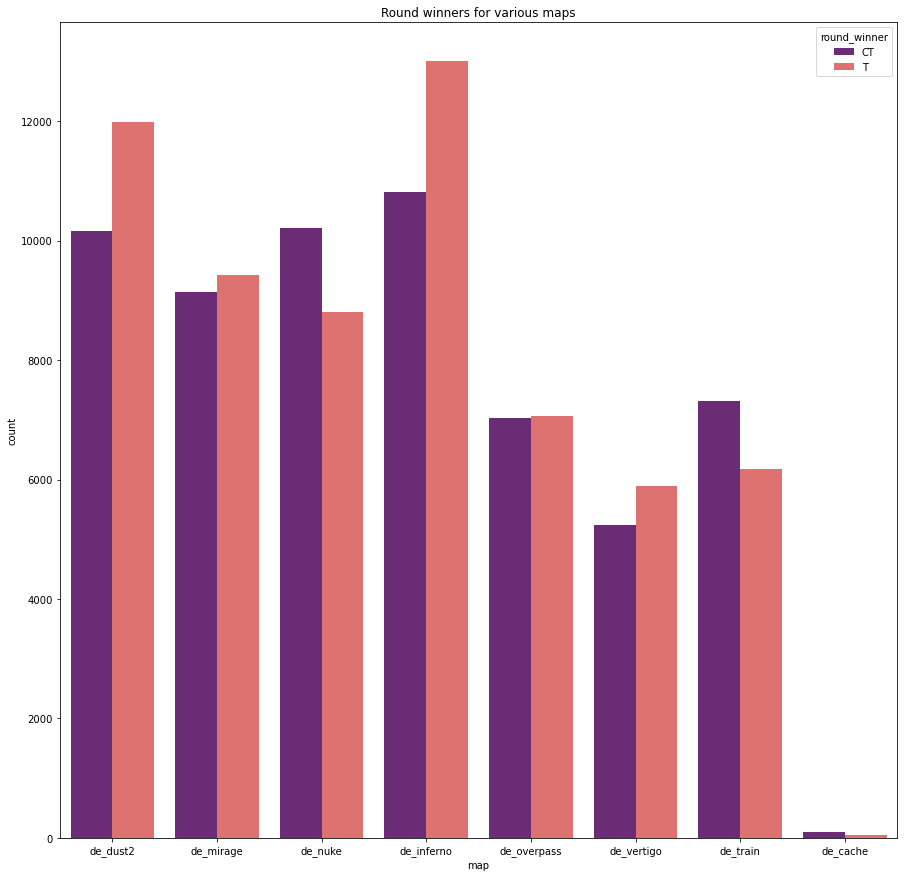

In [9]:
plt.figure(figsize=(15,15))
ax = sns.countplot(x="map", hue="round_winner", data=data, palette='magma')
ax.set(title='Round winners for various maps')
plt.show()

In [10]:
'''
numCols = data.select_dtypes([np.number]).columns

for col in numCols:
    plt.figure(figsize=(18,6))
    sns.displot(x=col,data=data, palette="magma")
    plt.show()
    '''

'\nnumCols = data.select_dtypes([np.number]).columns\n\nfor col in numCols:\n    plt.figure(figsize=(18,6))\n    sns.displot(x=col,data=data, palette="magma")\n    plt.show()\n    '

In [11]:
'''
weapons = ['ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
           'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
           'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
           't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
           'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
           't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
           'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
           'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
           'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
           'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
           'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova',
           'ct_weapon_p90', 't_weapon_p90', 'ct_weapon_r8revolver',
           't_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_sawedoff',
           'ct_weapon_scar20', 't_weapon_scar20', 'ct_weapon_sg553',
           't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08',
           'ct_weapon_ump45', 't_weapon_ump45', 'ct_weapon_xm1014',
           't_weapon_xm1014', 'ct_weapon_deagle', 't_weapon_deagle',
           'ct_weapon_fiveseven', 't_weapon_fiveseven', 'ct_weapon_usps',
           't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250', 'ct_weapon_p2000',
           't_weapon_p2000', 'ct_weapon_tec9', 't_weapon_tec9',
           'ct_grenade_hegrenade', 't_grenade_hegrenade', 'ct_grenade_flashbang',
           't_grenade_flashbang', 'ct_grenade_smokegrenade',
           't_grenade_smokegrenade', 'ct_grenade_incendiarygrenade',
           't_grenade_incendiarygrenade', 'ct_grenade_molotovgrenade',
           't_grenade_molotovgrenade', 'ct_grenade_decoygrenade',
           't_grenade_decoygrenade']

nums = [0]*len(weapons)
'''

"\nweapons = ['ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',\n           'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',\n           'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',\n           't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',\n           'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',\n           't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',\n           'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',\n           'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',\n           'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',\n           'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',\n           'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova',\n           'ct_weapon_p90', 't_weapon_p90', 'ct_weapon_r8revolver',\n           't_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_sawedo

In [12]:
'''
for i in range(0, len(weapons)):
    nums[weapons.index(weapons[i])] = sum(data[weapons[i]])
   
for i in range(0, len(weapons)):
    weapons[i] = [weapons[i], nums[i]]
    
weapons.sort(key=lambda xx: xx[1], reverse=False)

x = []
y = []

for i in range(0, len(weapons)):
    x.append(weapons[i][0])
    y.append(weapons[i][1])
    '''

'\nfor i in range(0, len(weapons)):\n    nums[weapons.index(weapons[i])] = sum(data[weapons[i]])\n   \nfor i in range(0, len(weapons)):\n    weapons[i] = [weapons[i], nums[i]]\n    \nweapons.sort(key=lambda xx: xx[1], reverse=False)\n\nx = []\ny = []\n\nfor i in range(0, len(weapons)):\n    x.append(weapons[i][0])\n    y.append(weapons[i][1])\n    '

In [13]:
'''
plt.rcParams["figure.figsize"] = (12, 32)
plt.rcParams["font.size"] = 18
plt.title("Popular weapons.")
plt.grid(linestyle="--")
plt.xticks(rotation=61)
plt.plot(y, x, linewidth=2.61, marker="o")
plt.show()    '''

'\nplt.rcParams["figure.figsize"] = (12, 32)\nplt.rcParams["font.size"] = 18\nplt.title("Popular weapons.")\nplt.grid(linestyle="--")\nplt.xticks(rotation=61)\nplt.plot(y, x, linewidth=2.61, marker="o")\nplt.show()    '

In [14]:
round_winner=data['round_winner']

In [15]:
round_winner.describe()

count     122410
unique         2
top            T
freq       62406
Name: round_winner, dtype: object

In [16]:
round_winner.value_counts()

T     62406
CT    60004
Name: round_winner, dtype: int64

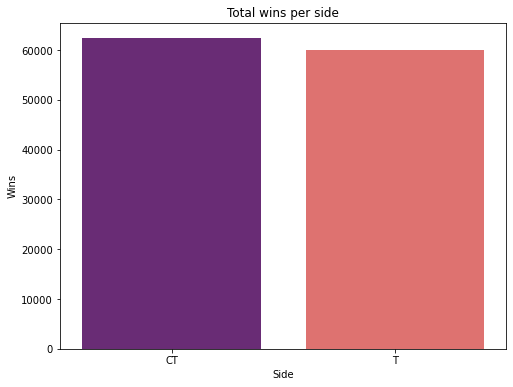

In [17]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=data['round_winner'].unique(), y=data['round_winner'].value_counts() , palette='magma')
ax.set(title='Total wins per side', xlabel='Side', ylabel='Wins')
plt.show()

<AxesSubplot:ylabel='round_winner'>

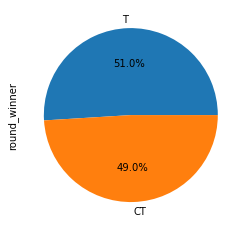

In [18]:
round(round_winner.value_counts()/data.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')

## Eda Bitti

# ENCODING

In [19]:
data.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [20]:
data['bomb_planted'] = data['bomb_planted'].astype(np.int16)

In [21]:
encoder = LabelEncoder()

data['map'] = encoder.fit_transform(data['map'])
map_mappings={index : label for index, label in enumerate(encoder.classes_)}
print(map_mappings)

{0: 'de_cache', 1: 'de_dust2', 2: 'de_inferno', 3: 'de_mirage', 4: 'de_nuke', 5: 'de_overpass', 6: 'de_train', 7: 'de_vertigo'}


In [22]:
data['round_winner'] = encoder.fit_transform(data['round_winner'])
roundwinner_mappings={index : label for index, label in enumerate(encoder.classes_)}
print(roundwinner_mappings)

{0: 'CT', 1: 'T'}


# Remove Duplicates

In [23]:
#checking duplicated row
data.duplicated().sum()
data.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [24]:
data = data.drop_duplicates()

data.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Scaling

In [25]:
column_names = list(data.columns.values)

In [26]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#pd.DataFrame(X)

scaler = StandardScaler()

data2 = data.drop(['round_winner'], axis = 1)
data2 = scaler.fit_transform(data2)
data2 = pd.DataFrame(data2)
data2['round_winner'] = data['round_winner']
data2.columns = column_names
data = data2.copy()

# Split X and Y

In [27]:
y=data['round_winner']
X=data.drop('round_winner', axis=1)

X.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1.509685,-1.409672,-1.413115,-1.303996,-0.363148,0.683520,0.716735,-1.865404,-1.737687,-0.530630,...,-1.076826,-1.051011,-0.910628,-0.911032,-0.701888,-0.139622,-0.214537,-0.829282,-0.16322,-0.154805
1,1.153269,-1.409672,-1.413115,-1.303996,-0.363148,0.683520,0.716735,0.482854,-0.014716,-0.831283,...,-1.076826,-1.051011,-0.910628,0.178864,-0.701888,-0.139622,-0.214537,-0.829282,-0.16322,-0.154805
2,0.025964,-1.409672,-1.413115,-1.303996,-0.363148,-0.130929,0.009485,-0.139434,-0.589039,-0.818019,...,-1.076826,-1.051011,-0.910628,0.178864,-0.701888,-0.139622,-0.214537,-0.829282,-0.16322,-0.154805
3,-0.349805,-1.409672,-1.413115,-1.303996,-0.363148,-0.130929,0.009485,-0.139434,-0.589039,-0.818019,...,-1.076826,-1.051011,-0.910628,-0.911032,-0.701888,-0.139622,-0.214537,-0.829282,-0.16322,-0.154805
4,1.509121,-1.201435,-1.413115,-1.303996,-0.363148,0.683520,0.716735,-0.738240,-1.737687,0.738304,...,-1.076826,-1.051011,-0.910628,-0.911032,-0.701888,-0.139622,-0.214537,-0.829282,-0.16322,-0.154805


# Remove Correlation
Threshold = 0.8

In [28]:
'''corr = pd.DataFrame(X).corr()
plt.figure(figsize = (30,30))
sns.heatmap(corr, cmap ='RdYlGn', linewidths = 0.30)'''

"corr = pd.DataFrame(X).corr()\nplt.figure(figsize = (30,30))\nsns.heatmap(corr, cmap ='RdYlGn', linewidths = 0.30)"

In [29]:
corr_matrix = X.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(to_drop)

['t_helmets', 'ct_players_alive', 't_players_alive', 't_grenade_smokegrenade', 't_grenade_molotovgrenade']


In [30]:
for column in to_drop:
    X.drop(str(column), axis="columns", inplace=True)

# Remove Unnecessary Columns

In [31]:
columns=X.columns

In [32]:
t=[]
for i in columns:
    t.append(X[i].nunique())
    
X[i].nunique()

3

In [33]:
temp =[]
for i in range(len(t)):
    if t[i]==1:
        temp.append(i)
        print(i)

19
27
34
49
55
57


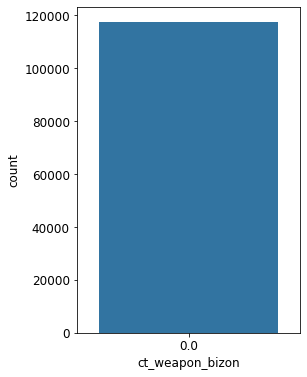

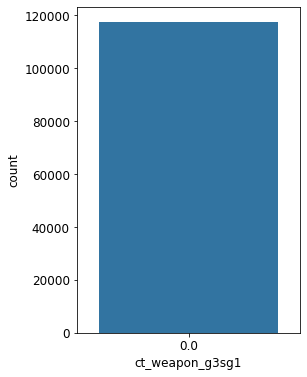

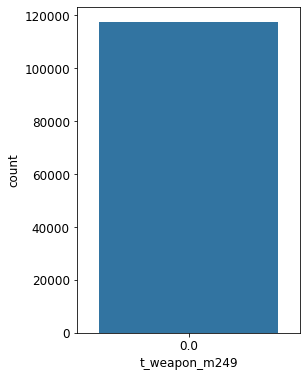

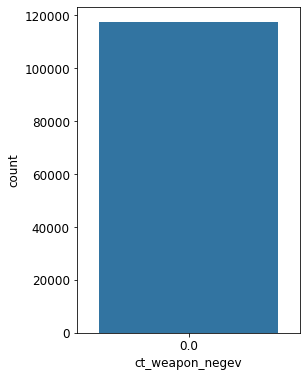

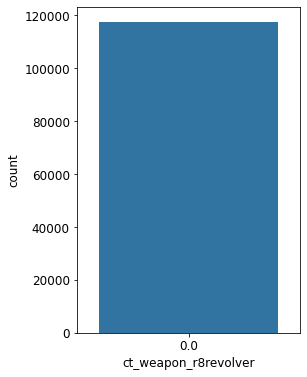

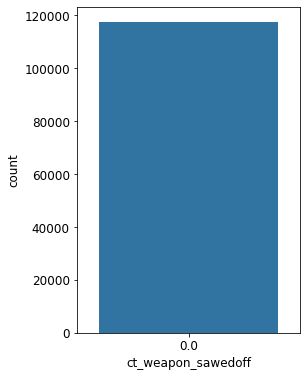

In [34]:
plt.rcParams["figure.figsize"] = (4, 6)
plt.rcParams["font.size"] = 12
for i in temp:
    sns.countplot(X[columns[i]])
    plt.show()

In [35]:
for i in temp:
    X.drop(columns[i], axis = 1, inplace = True)


In [36]:
X

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1.509685,-1.409672,-1.413115,-1.303996,-0.363148,0.683520,0.716735,-1.865404,-1.737687,-0.530630,...,-0.713585,-0.550042,-1.076826,-1.051011,-0.910628,-0.701888,-0.139622,-0.214537,-0.16322,-0.154805
1,1.153269,-1.409672,-1.413115,-1.303996,-0.363148,0.683520,0.716735,0.482854,-0.014716,-0.831283,...,-0.713585,-0.550042,-1.076826,-1.051011,-0.910628,-0.701888,-0.139622,-0.214537,-0.16322,-0.154805
2,0.025964,-1.409672,-1.413115,-1.303996,-0.363148,-0.130929,0.009485,-0.139434,-0.589039,-0.818019,...,-0.713585,-0.550042,-1.076826,-1.051011,-0.910628,-0.701888,-0.139622,-0.214537,-0.16322,-0.154805
3,-0.349805,-1.409672,-1.413115,-1.303996,-0.363148,-0.130929,0.009485,-0.139434,-0.589039,-0.818019,...,-0.713585,-0.550042,-1.076826,-1.051011,-0.910628,-0.701888,-0.139622,-0.214537,-0.16322,-0.154805
4,1.509121,-1.201435,-1.413115,-1.303996,-0.363148,0.683520,0.716735,-0.738240,-1.737687,0.738304,...,-0.713585,-0.550042,-1.076826,-1.051011,-0.910628,-0.701888,-0.139622,-0.214537,-0.16322,-0.154805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117443,-1.488758,0.880931,1.483980,1.283219,2.753701,-1.558084,-1.107969,-0.720628,0.324135,-0.875497,...,-0.713585,-0.550042,-0.511658,0.058215,-0.335404,-0.701888,-0.139622,-0.214537,-0.16322,-0.154805
117444,1.508370,0.880931,1.690915,1.283219,-0.363148,0.683520,0.716735,-1.307692,-0.732620,0.132576,...,-0.713585,-0.550042,-0.511658,0.058215,-0.335404,-0.701888,-0.139622,-0.214537,-0.16322,-0.154805
117445,0.381065,0.880931,1.690915,1.283219,-0.363148,0.683520,0.716735,1.040566,0.990350,-0.778227,...,0.839600,-0.550042,1.183847,1.167441,0.815045,-0.017999,-0.139622,-0.214537,-0.16322,-0.154805
117446,0.005297,0.880931,1.690915,1.283219,-0.363148,0.683520,0.716735,1.040566,0.990350,-0.778227,...,0.839600,-0.550042,-0.511658,1.722054,-0.910628,-0.701888,-0.139622,-0.214537,-0.16322,-0.154805


# PCA

In [37]:
pca = PCA(n_components = 80)
pca.fit(X)

x_pca = pca.transform(X)
summary = sum(pca.explained_variance_ratio_)
print("Variance ratio: ", pca.explained_variance_ratio_)
print("Sum: ", sum(pca.explained_variance_ratio_))

Variance ratio:  [0.08434502 0.04333532 0.03952315 0.03029601 0.02713473 0.02155464
 0.0171108  0.01680129 0.01647663 0.01430573 0.01396294 0.01329016
 0.01299083 0.01272972 0.01261626 0.01238762 0.01238268 0.01227591
 0.01219384 0.01217612 0.01208845 0.01204998 0.01197704 0.01194758
 0.01188968 0.01184685 0.0118225  0.01180449 0.01178499 0.01177902
 0.01177027 0.01176736 0.01174824 0.01172854 0.01172144 0.01165774
 0.0116368  0.01157051 0.01148352 0.01140817 0.01133068 0.01124426
 0.01122407 0.0111418  0.01102173 0.01093062 0.01089149 0.01084462
 0.01074231 0.01066701 0.01040823 0.01038787 0.01028509 0.01020804
 0.01007208 0.01002326 0.00991341 0.00977222 0.00966144 0.00937384
 0.00929418 0.00884265 0.00881904 0.00870707 0.00831067 0.00816468
 0.00781825 0.00760189 0.00727102 0.00655297 0.00565614 0.00521828
 0.00355604 0.00323067 0.00305067 0.00244317 0.00232246 0.00209199
 0.00187374 0.00183872]
Sum:  0.9961809417384365


In [38]:
print("Variance'ın {0:.2f}%".format(summary * 100),"'sini koruyabiliyoruz 80 ile. Biz bunun 95% olmasını istiyoruz.")

Variance'ın 99.62% 'sini koruyabiliyoruz 80 ile. Biz bunun 95% olmasını istiyoruz.


In [39]:
'''
plt.figure(figsize = (10,10))
plt.hist(pca.explained_variance_ratio_, bins = 80)
plt.show()
'''

'\nplt.figure(figsize = (10,10))\nplt.hist(pca.explained_variance_ratio_, bins = 80)\nplt.show()\n'

In [40]:
def getKComponents(pca, alpha):
    total_variance = 0
    
    for feature, variance in enumerate(pca.explained_variance_ratio_):
        total_variance += variance
        if (total_variance >= 1 - alpha):
            return feature + 1
    return len(pca.explained_variance_ratio_)

In [41]:
K = getKComponents(pca, 0.10)
print(K, "Component ile 90% variance'ı koruyoruz.")

62 Component ile 90% variance'ı koruyoruz.


In [42]:
K = getKComponents(pca, 0.05)
print(K, "Component ile 95%'lik variance'ı koruyoruz. Biz 95%'i seçeceğiz.")

68 Component ile 95%'lik variance'ı koruyoruz. Biz 95%'i seçeceğiz.


In [43]:
X = pca.transform(X)[: , : K]

In [44]:
X=pd.DataFrame(X)

In [45]:
X

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,-3.081945,-2.547041,-2.228650,1.417889,-0.598456,-1.123216,0.732302,-0.803317,-0.182702,-0.302066,...,0.258220,-0.674225,0.207911,-0.014680,-0.398929,-0.509364,-0.013526,-0.736564,-0.082954,-0.287318
1,-2.033516,-2.000107,-1.326798,1.566379,-0.813405,-1.531728,0.652228,-0.727087,-0.218995,-0.350457,...,0.122309,-0.724863,0.326957,0.005271,-0.402284,-0.594198,0.081235,-0.308651,-0.185656,-0.495688
2,-2.802568,-0.715406,-1.193231,1.216229,-0.813693,-1.471377,0.801615,-0.741728,-0.087765,-0.542456,...,0.300510,-0.639327,0.349048,-0.128560,-0.356599,-0.536895,0.004264,-0.555411,-0.172894,-0.282574
3,-3.157271,-0.537185,-0.483970,1.764575,-0.597280,-0.943086,1.804780,0.794950,-0.819928,-0.381818,...,0.834410,0.235351,1.320463,-1.330428,0.089411,0.081243,0.065630,-0.804834,-0.215324,-0.230017
4,-2.435563,-2.581443,-2.654961,1.273815,-0.180179,-0.802278,0.610695,-0.755642,-0.181354,-0.388229,...,0.075243,-0.437278,-0.054216,0.068872,-0.234159,-0.360065,-0.044377,-0.447045,-0.202132,0.015735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117443,-2.353721,2.199456,1.387166,-2.415185,-1.386813,0.205910,-1.506734,0.910413,-0.433346,-0.885789,...,0.301306,-0.343155,1.147534,-1.079951,0.718118,0.418547,-0.377958,2.060476,0.240034,0.045771
117444,-1.065601,-2.922724,-1.512977,-1.519958,-0.343297,0.184553,-0.772447,1.082693,-0.174762,0.440067,...,-0.121874,0.268276,-0.111832,-0.337272,0.119830,0.536075,0.313368,0.181741,0.741507,-0.114475
117445,1.692068,-0.206382,1.901115,-0.539439,1.417825,0.416888,-1.737142,-0.263688,-0.126820,-0.345745,...,-0.000948,1.015851,0.035888,-0.317211,-0.714225,0.113300,-0.866654,-0.541782,1.436980,-1.893861
117446,0.514772,-0.547590,2.343214,-0.968907,1.605525,0.340758,-2.085403,-0.369175,-0.481850,-0.313475,...,-0.279372,0.803970,-0.206983,-0.283086,-0.780220,-0.039580,-0.810260,-0.190069,1.121238,-1.778204
